In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle as pkl
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
from IPython.display import Image
import pandas as pd

/tmp/ipykernel_39491/2020941014.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv('causal_BH.csv')
df

,M_BH,log_sigma0,log_R_e_sph_eq_kpc,<Sigma>_e,"GJC23log(M*,gal/M_sun)",GJC23log(sSFR),GJC23W2-W3
0,9.380211,2.471453,0.885259,1.785338,11.24,-12.003463,0.39
1,9.102971,2.515012,0.960195,2.871399,11.47,-12.472614,0.02
2,7.591065,2.296073,0.321785,2.132829,10.64,-11.647889,0.27
3,8.903090,2.388510,1.239710,2.507699,11.52,-9.806383,3.00
4,8.667597,2.521439,1.492833,0.756940,11.23,-12.723495,0.17
5,9.649324,2.424277,0.798621,3.029951,11.39,-15.691030,0.07
6,10.279788,2.520405,1.221646,2.660104,11.71,-15.232879,-0.34
7,9.614930,2.492718,1.150179,1.507212,11.39,-15.088970,-0.21
8,8.243991,2.133858,0.361728,1.214911,10.13,-14.431030,-0.09
9,8.626649,2.306361,0.430994,2.084065,10.64,-14.941030,0.12


In [4]:
posterior = np.load('output/posterior.npy')
posterior.shape

(100000, 7, 7)

In [5]:
# in posteriors, the first dimension is the number of samples.
# find unique samples, and how many times they occur

unique_samples, counts = np.unique(posterior, axis=0, return_counts=True)

# sort the counts in descending order
sorted_indices = np.argsort(-counts)

unique_samples = unique_samples[sorted_indices]
counts = counts[sorted_indices]

In [6]:
unique_samples.shape

(48180, 7, 7)

502 / 100000 ( 0.502 %)


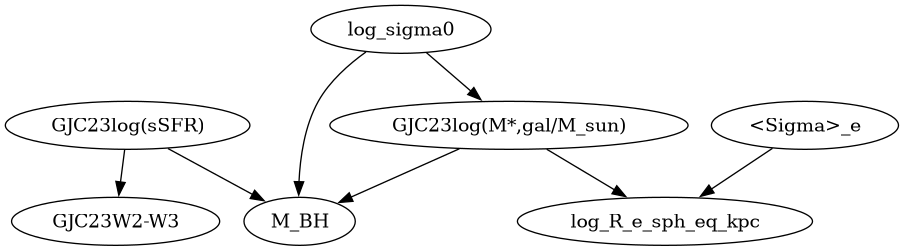

502 / 100000 ( 0.502 %)


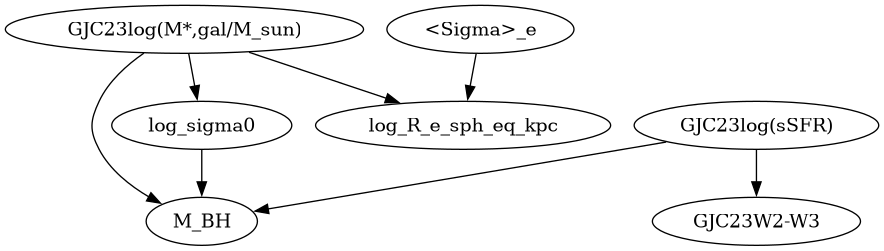

483 / 100000 ( 0.483 %)


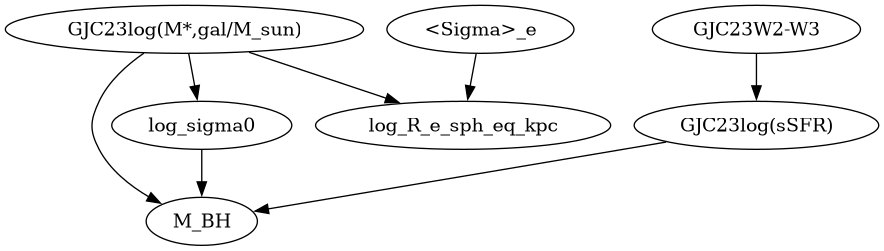

459 / 100000 ( 0.459 %)


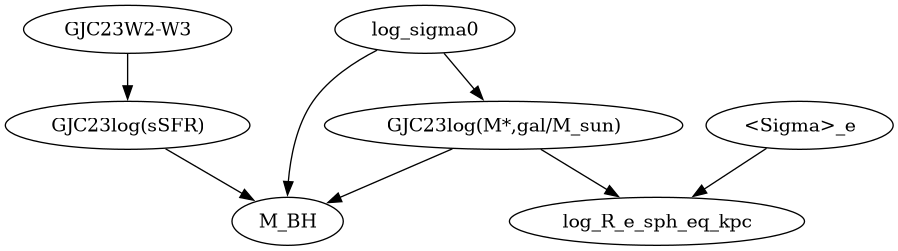

425 / 100000 ( 0.42500000000000004 %)


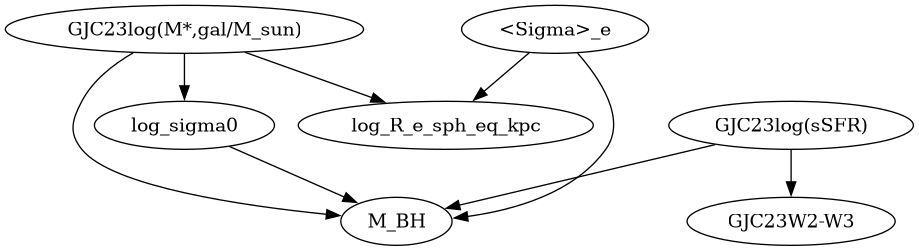

418 / 100000 ( 0.418 %)


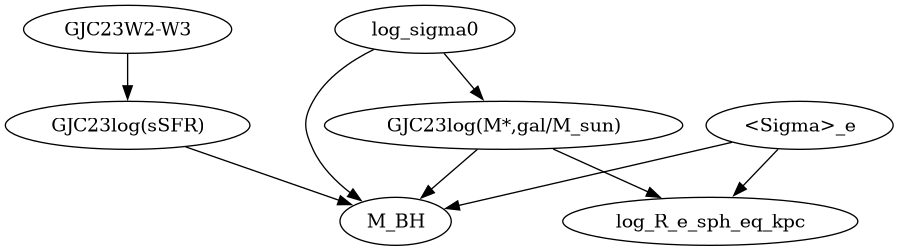

414 / 100000 ( 0.414 %)


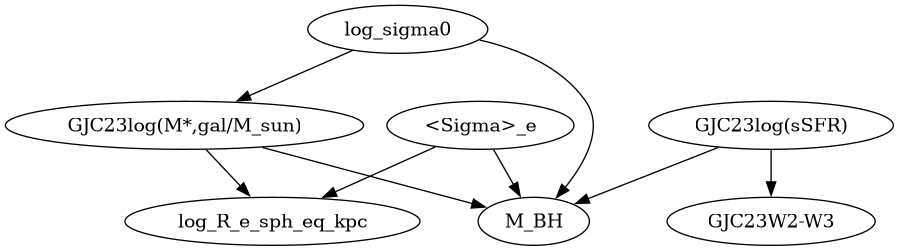

363 / 100000 ( 0.363 %)


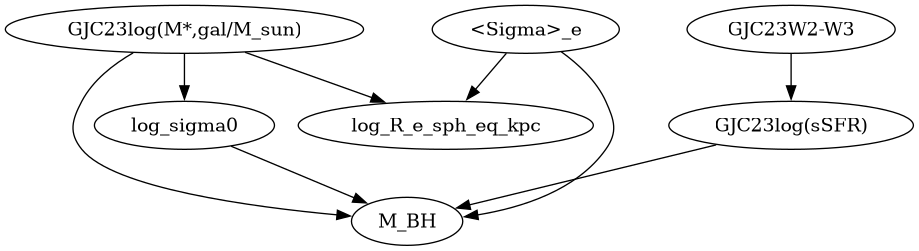

190 / 100000 ( 0.19 %)


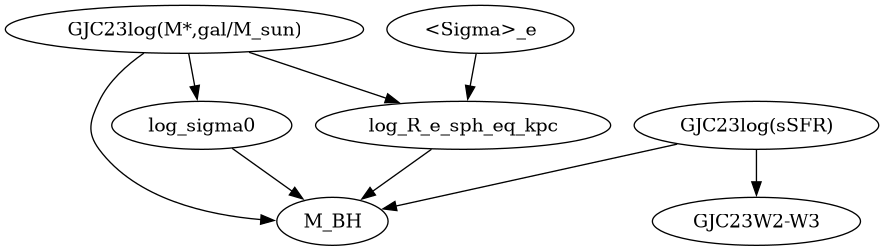

182 / 100000 ( 0.182 %)


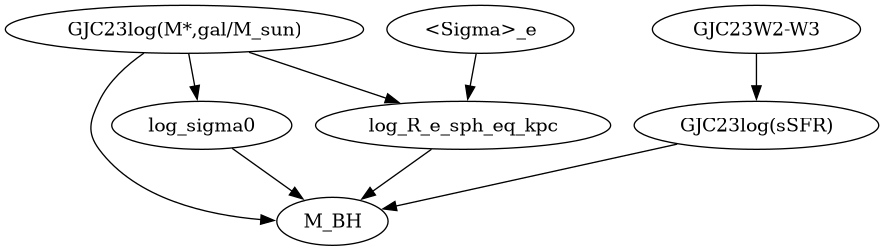

In [7]:
# for each unique samples, draw the graph, and print the count. each sample is a NxN numpy array
# use pygraphviz to draw the graph

labels_list = df.columns


for i, sample in enumerate(unique_samples[:10]):
    graph = nx.from_numpy_array(sample, create_using=nx.DiGraph)

    # Set custom labels for each node
    labels = {node: labels_list[node] for node in graph.nodes()}
    
    # Apply labels to the graph
    for node in graph.nodes():
        graph.nodes[node]['label'] = labels[node]

    
    gviz = nx.nx_agraph.to_agraph(graph)
    # Render the graph to a PNG image and display it inline
    output_path = 'graph.png'
    gviz.draw(output_path, prog='dot', format='png')  # Use 'dot' or another Graphviz layout engine

    print(counts[i],'/',posterior.shape[0],'(',counts[i]/posterior.shape[0]*100,'%)')
    # Display the image
    display(Image(output_path))

Text(0, 0.5, 'Counts')

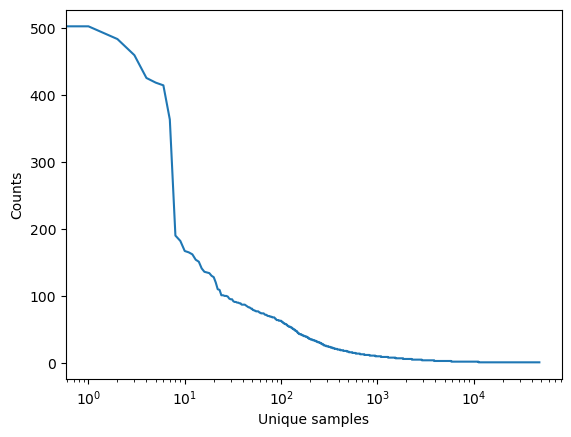

In [15]:
plt.plot(range(len(counts)), counts)
plt.xscale('log')
plt.xlabel('Unique samples')
plt.ylabel('Counts')